# Model Selection

Load the file “Data_For_HW1.xls” file from the course website.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


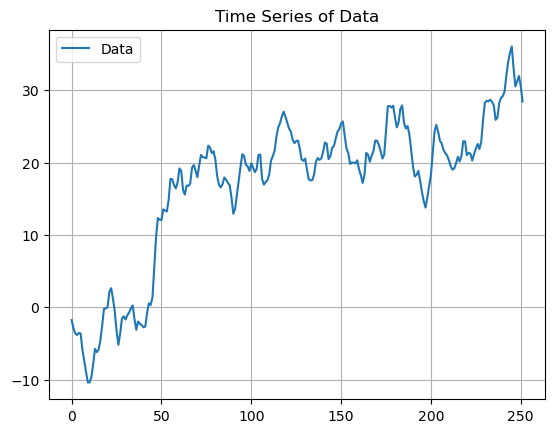

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel("/Users/Eric/opt/anaconda3/envs/dsm/Data_For_HW1.xlsx")
data.columns = ['Data']

data.plot()
plt.grid(True)
plt.title("Time Series of Data")
plt.show()

## Obtain Linear Trend and Detrending

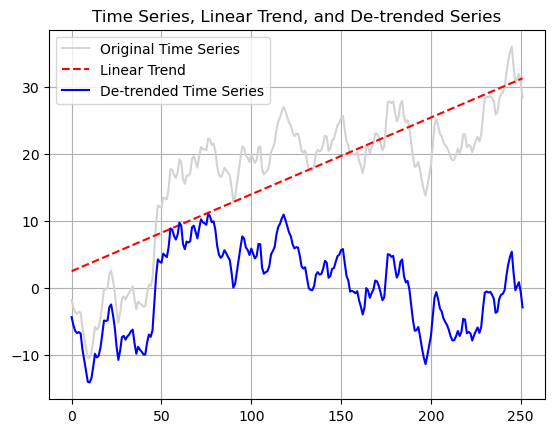

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(data))
y = data.values.flatten()

# Linear regression
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

linear_trend = p(x)

# De-trend the series
detrended = y - linear_trend

# Plot the original time series (optional)
plt.plot(x, y, label='Original Time Series', color='lightgrey')

# Plot the linear trend
plt.plot(x, linear_trend, label='Linear Trend', color='red', linestyle='--')

# Plot the de-trended series
plt.plot(x, detrended, label='De-trended Time Series', color='blue')

plt.grid(True)
plt.legend()
plt.title("Time Series, Linear Trend, and De-trended Series")
plt.show()


## (c) Plot sample autocorrelation function for de-trended time series

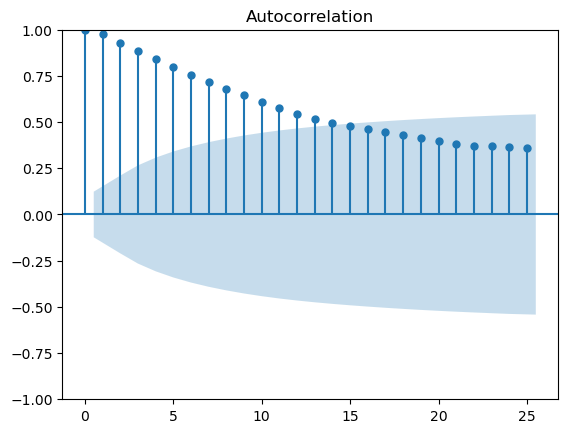

In [3]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(detrended)
plt.show()

### Model Selction

$\text{I recommend to use AR(1) to model the de-trended time series since the ACF shows a gradual (exponential) decay.}$ 
$\text{This also conforms with the AR(1) example given in the lecture.}$

## (d) Plot first difference of the original time series.

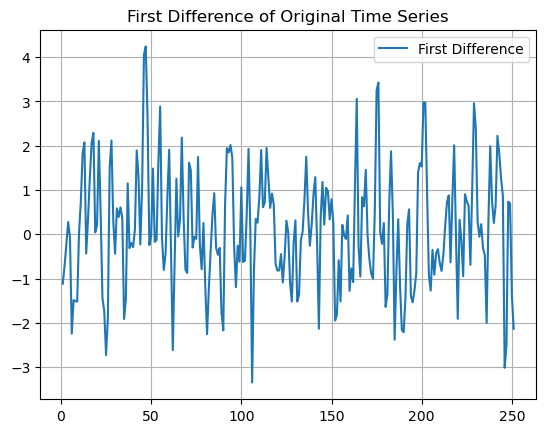

In [4]:
differenced = data.diff().dropna()
differenced.plot()
plt.title("First Difference of Original Time Series")
labels = ['First Difference']
plt.legend(labels)
plt.grid(True)
plt.show()

## (e) Plot sample autocorrelation function for differenced time series

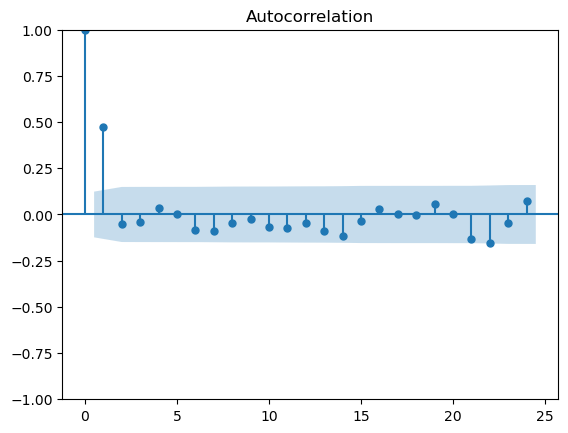

In [5]:
plot_acf(differenced)
plt.show()

### Model Selection

$\text{I recommend to use MA(1) since the ACF has a sharp cut-off after a certain number of lags.}$
$\text{This also conforms with the MA(1) example given in the lecture.}$